In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [2]:
airline = pd.read_excel("../Assignment 18-Forecasting/Airlines+Data.xlsx",
                       index_col=0, 
                       header=0,
                       parse_dates=['Month'])
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [4]:
airline.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

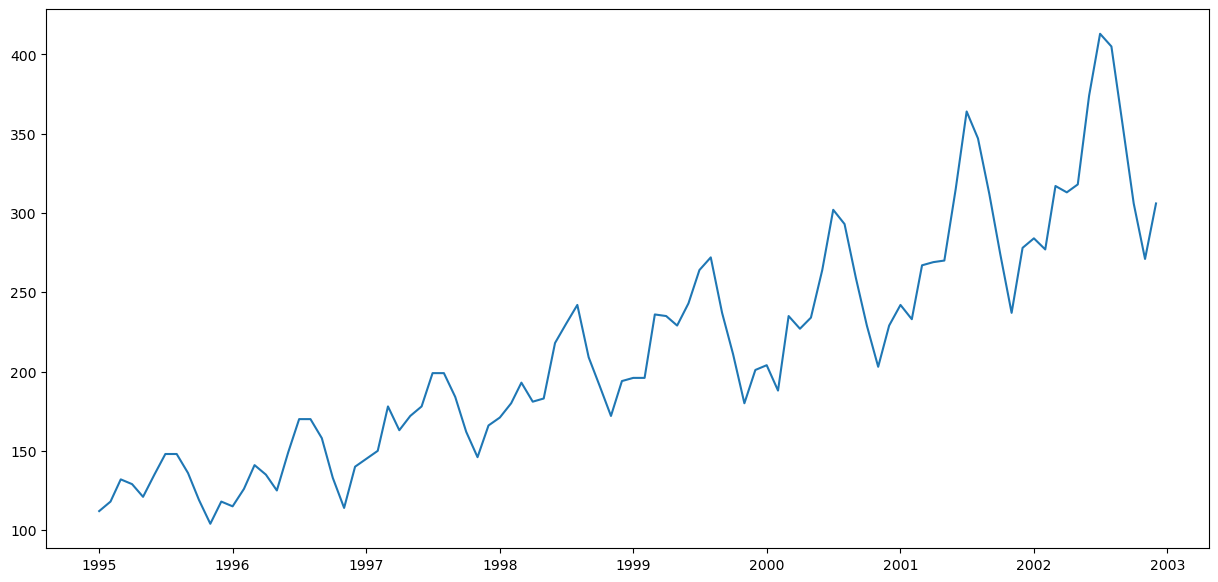

In [5]:
plt.figure(figsize = (15,7))
plt.plot(airline)

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

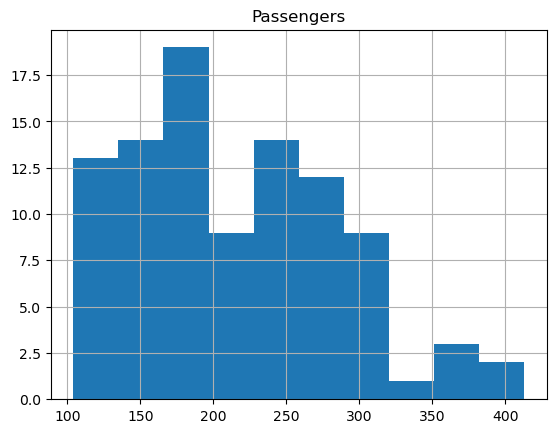

In [6]:
# create a histogram plot
airline.hist()

<Axes: ylabel='Density'>

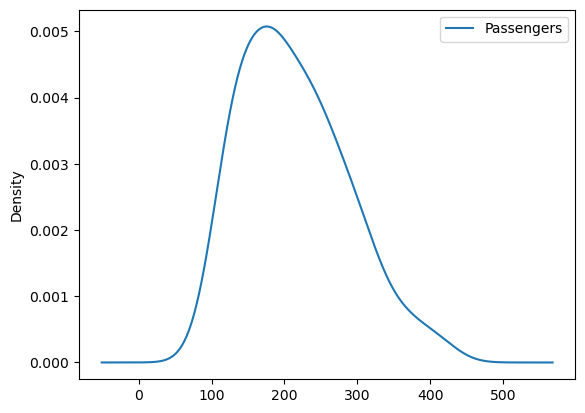

In [7]:
# create a density plot
airline.plot(kind='kde')

In [8]:
airline = airline.squeeze()

In [9]:
type(airline)

pandas.core.series.Series

In [10]:
# Grouping by Year
groups = airline.groupby(pd.Grouper(freq='A'))
groups

In [11]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<Axes: >

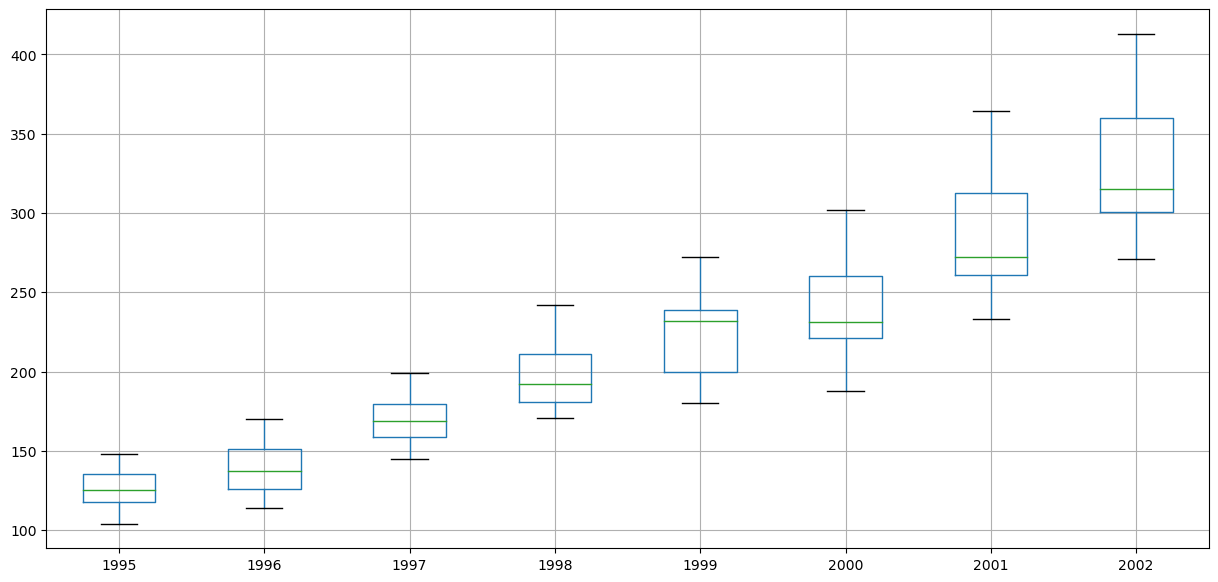

In [12]:
plt.figure(figsize = (15,7))
years.boxplot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

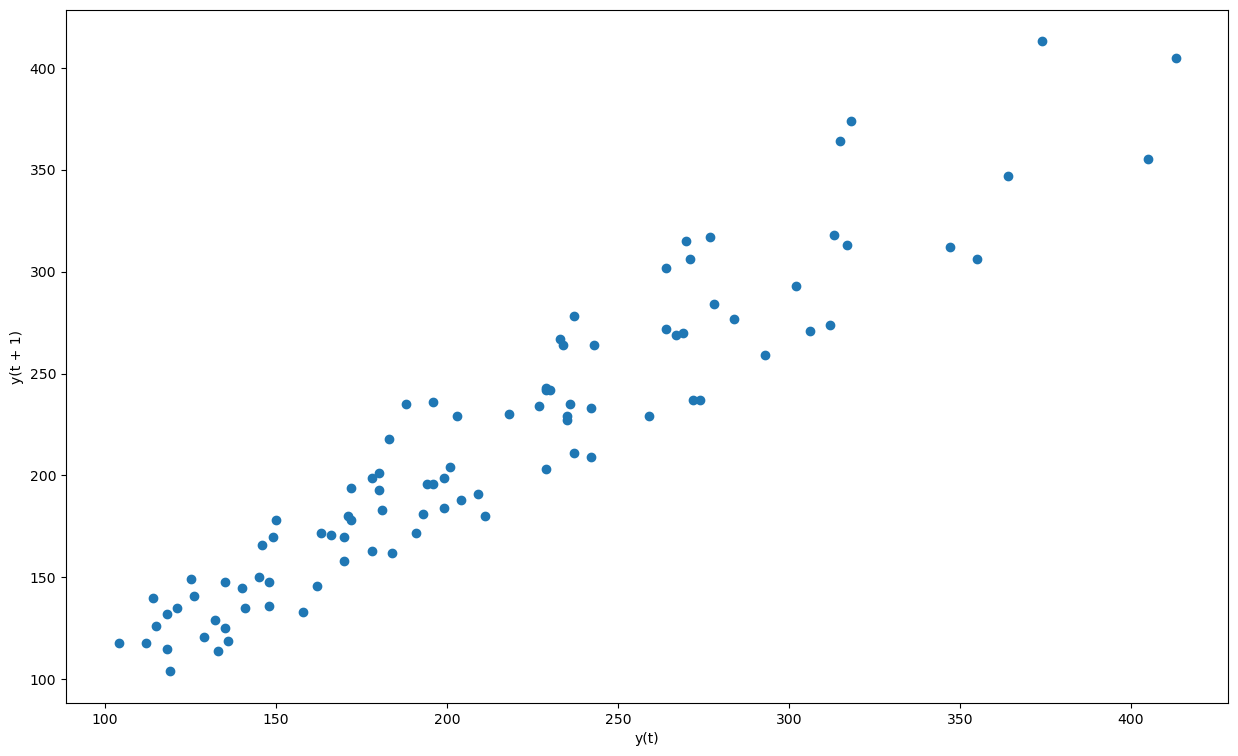

In [13]:
# create a scatter plot
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(airline)

<Figure size 3200x2000 with 0 Axes>

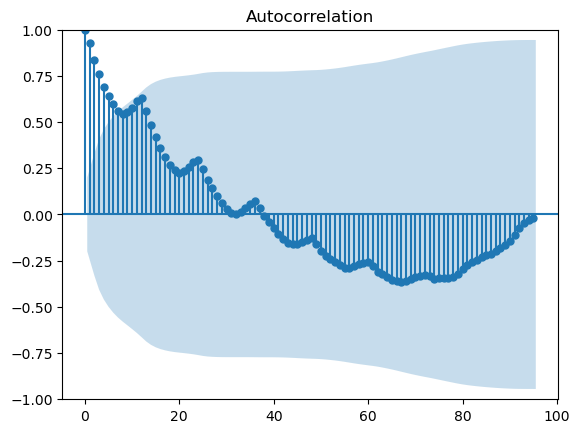

In [14]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (32,20))
plot_acf(airline, lags=95)
plt.show()

In [15]:
airline.shape

(96,)

In [16]:
upsampled = airline.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [17]:
upsampled.shape

(2892,)

In [18]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<Axes: xlabel='Month'>

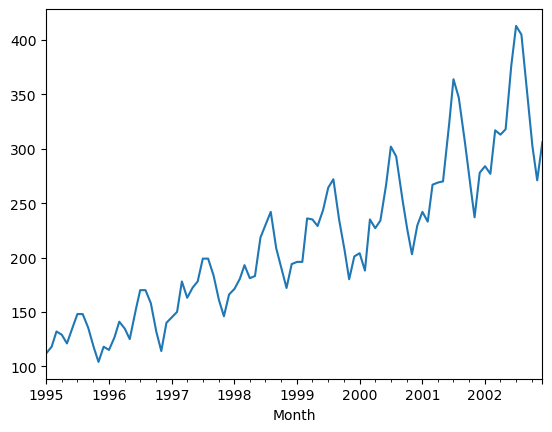

In [19]:
interpolated.plot()

<Axes: xlabel='Month'>

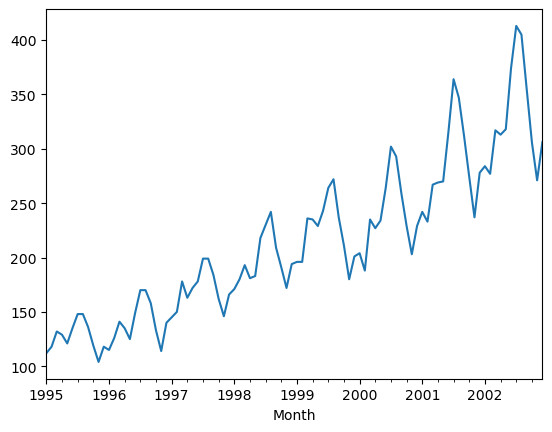

In [20]:
airline.plot()

In [21]:
# downsample to quarterly intervals
resample = airline.resample('Q')
quarterly_mean_sales = resample.mean()

<Axes: xlabel='Month'>

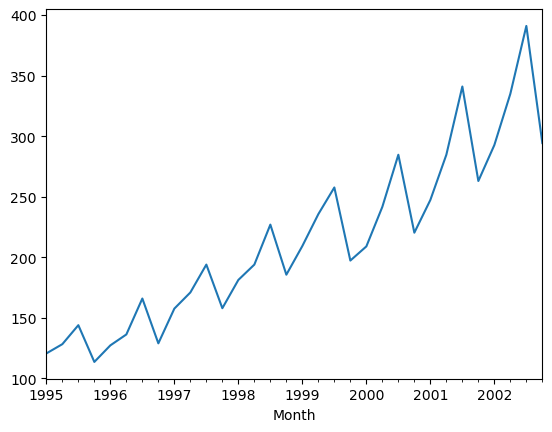

In [22]:
quarterly_mean_sales.plot()

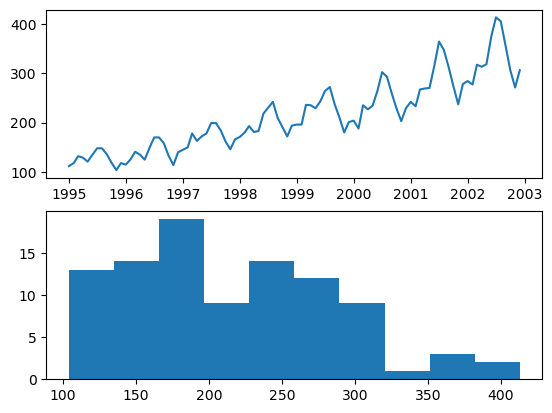

In [23]:
# line plot
plt.subplot(211)
plt.plot(airline)

# histogram
plt.subplot(212)
plt.hist(airline)

plt.show()

In [24]:
dataframe = pd.DataFrame(np.log(airline.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


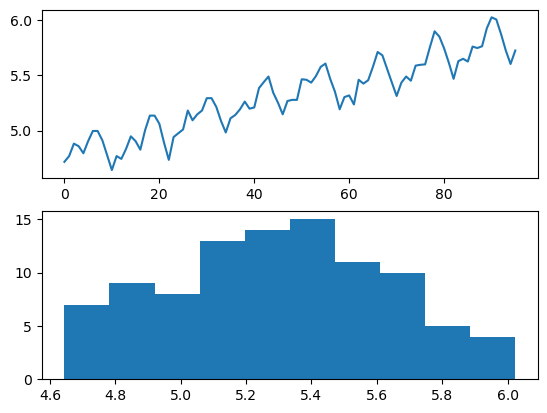

In [25]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [26]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

In [27]:
dataframe1 = pd.DataFrame(np.sqrt(airline.values), columns = ['Passengers'])
dataframe1

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


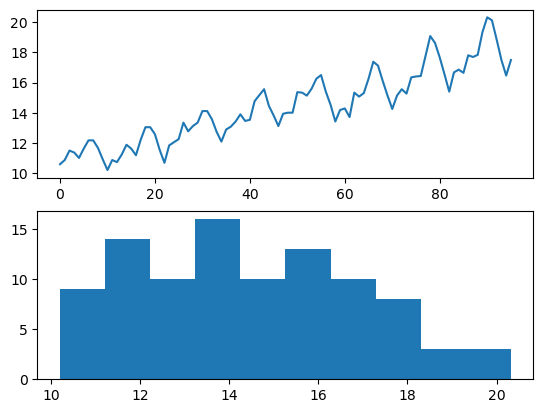

In [28]:
# line plot
plt.subplot(211)
plt.plot(dataframe1['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe1['Passengers'])
plt.show()

In [29]:
airline

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [34]:
airline = pd.read_excel("../Assignment 18-Forecasting/Airlines+Data.xlsx",
                       index_col=0, 
                       header=0,
                       parse_dates=['Month'])
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [35]:
airline.reset_index(inplace=True)

In [36]:
print(airline.columns)

Index(['Month', 'Passengers'], dtype='object')


In [37]:
airline['Passengers']

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [38]:
airline["month"] = airline['Month'].dt.strftime("%b") # month extraction
airline["year"] = airline['Month'].dt.strftime("%Y") # year extraction

In [39]:
airline

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [40]:
airline_pivot = pd.pivot_table(data = airline,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)

In [41]:
airline_pivot

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='month', ylabel='year'>

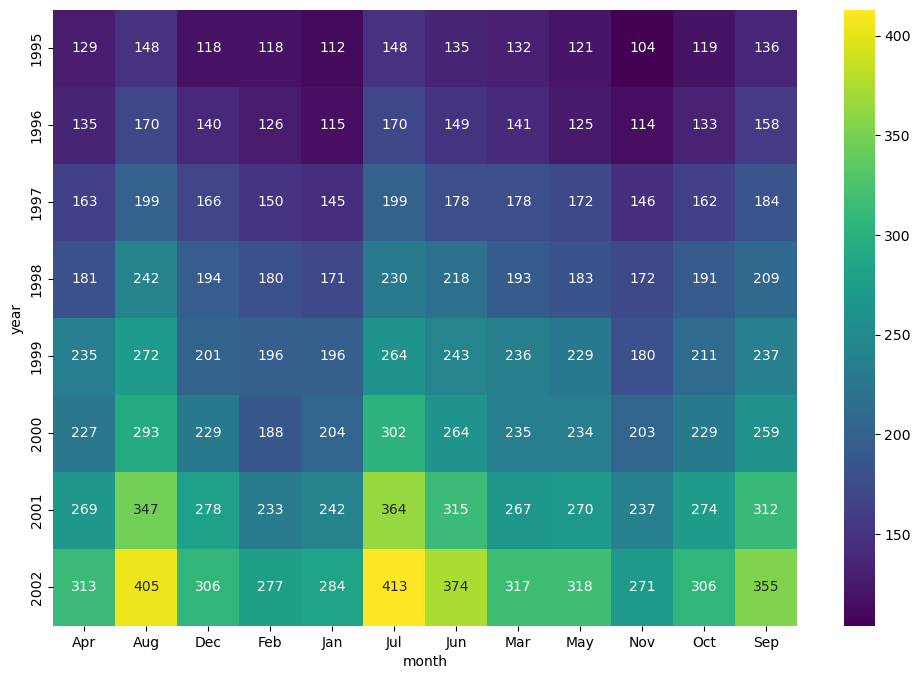

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(airline_pivot,
            annot=True,
            fmt="g",
            cmap = 'viridis') #fmt is format of the grid values

<Axes: xlabel='year', ylabel='Passengers'>

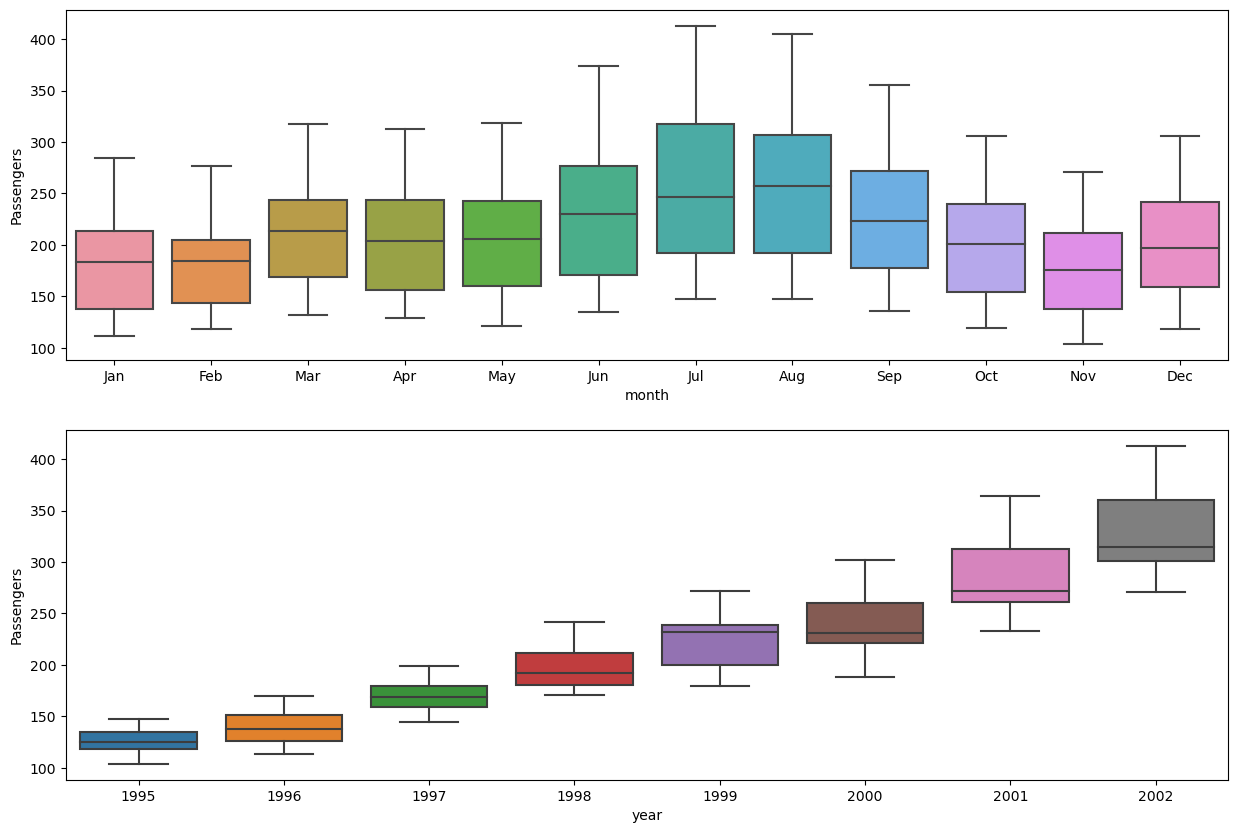

In [43]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airline)

<Axes: xlabel='year', ylabel='Passengers'>

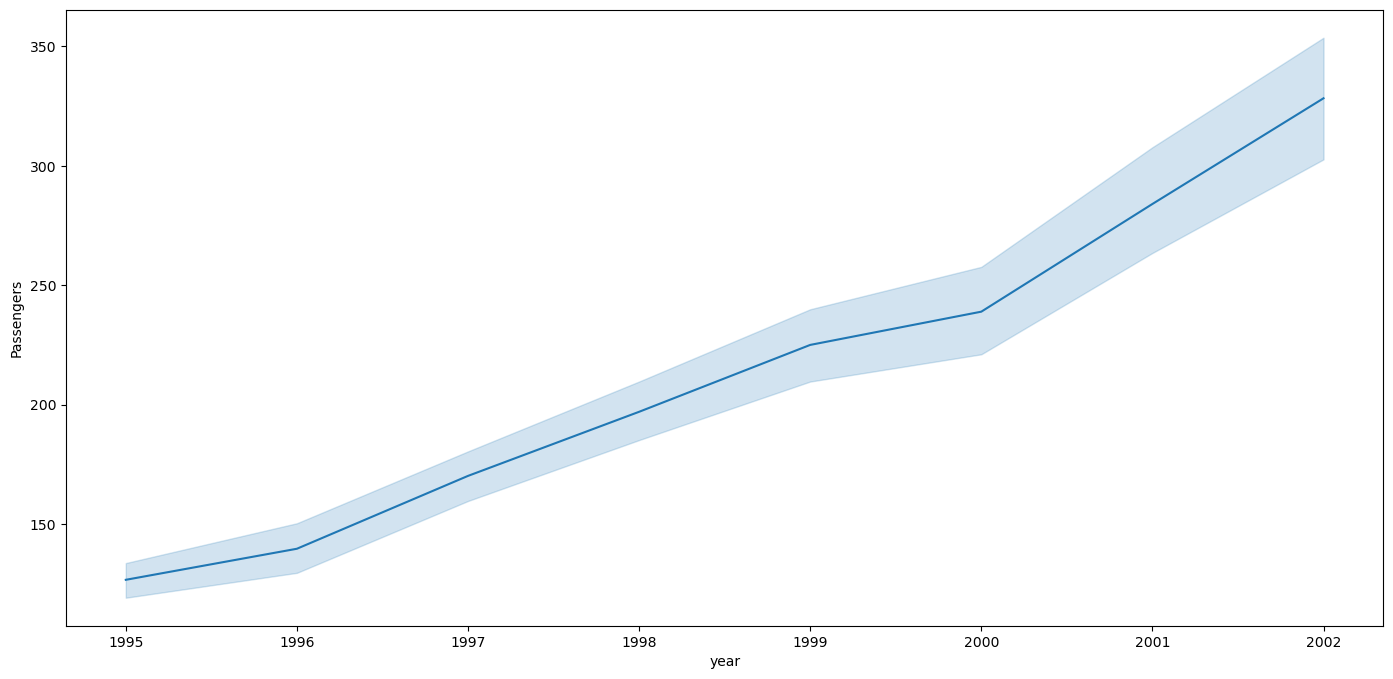

In [44]:
plt.figure(figsize=(17,8))
sns.lineplot(x="year",y="Passengers",data=airline)

In [45]:
airline.shape

(96, 4)

In [46]:
airline

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [47]:
# Complete the dataset
airline['t']=np.arange(1,97)
airline['t_square']=np.square(airline.t)
airline['log_Passengers']=np.log(airline.Passengers)
air2=pd.get_dummies(airline['month'])

In [48]:
air2 = air2.astype(bool)
air2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [49]:
airline=pd.concat([airline,air2],axis=1)
airline

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,Feb,1995,2,4,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,Mar,1995,3,9,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,Apr,1995,4,16,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,May,1995,5,25,4.795791,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,Sep,2002,93,8649,5.872118,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,Oct,2002,94,8836,5.723585,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,Nov,2002,95,9025,5.602119,False,False,False,False,False,False,False,False,False,True,False,False


In [50]:
# For self understanding of forecasting values data split into multiples of 12
Train = airline.head(84)
Test = airline.tail(12)

In [51]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,Feb,1995,2,4,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,Mar,1995,3,9,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,Apr,1995,4,16,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,May,1995,5,25,4.795791,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,False,True,False,False,False,False,False,False,False,False,False,False
80,2001-09-01,312,Sep,2001,81,6561,5.743003,False,False,False,False,False,False,False,False,False,False,False,True
81,2001-10-01,274,Oct,2001,82,6724,5.613128,False,False,False,False,False,False,False,False,False,False,True,False
82,2001-11-01,237,Nov,2001,83,6889,5.468060,False,False,False,False,False,False,False,False,False,True,False,False


In [52]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,False,False,False,False,True,False,False,False,False,False,False,False
85,2002-02-01,277,Feb,2002,86,7396,5.624018,False,False,False,True,False,False,False,False,False,False,False,False
86,2002-03-01,317,Mar,2002,87,7569,5.758902,False,False,False,False,False,False,False,True,False,False,False,False
87,2002-04-01,313,Apr,2002,88,7744,5.746203,True,False,False,False,False,False,False,False,False,False,False,False
88,2002-05-01,318,May,2002,89,7921,5.762051,False,False,False,False,False,False,False,False,True,False,False,False
89,2002-06-01,374,Jun,2002,90,8100,5.924256,False,False,False,False,False,False,True,False,False,False,False,False
90,2002-07-01,413,Jul,2002,91,8281,6.023448,False,False,False,False,False,True,False,False,False,False,False,False
91,2002-08-01,405,Aug,2002,92,8464,6.003887,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,Sep,2002,93,8649,5.872118,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,Oct,2002,94,8836,5.723585,False,False,False,False,False,False,False,False,False,False,True,False


In [53]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.199236534802715

In [54]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.0573611031562

In [55]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979330975

In [56]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

In [57]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612093467

In [58]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708646

In [59]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.51917254432382

In [60]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.73121052134115

In [61]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [62]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airline).fit()

In [63]:
pred_new  = pd.Series(model_full.predict(airline))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [64]:
airline["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

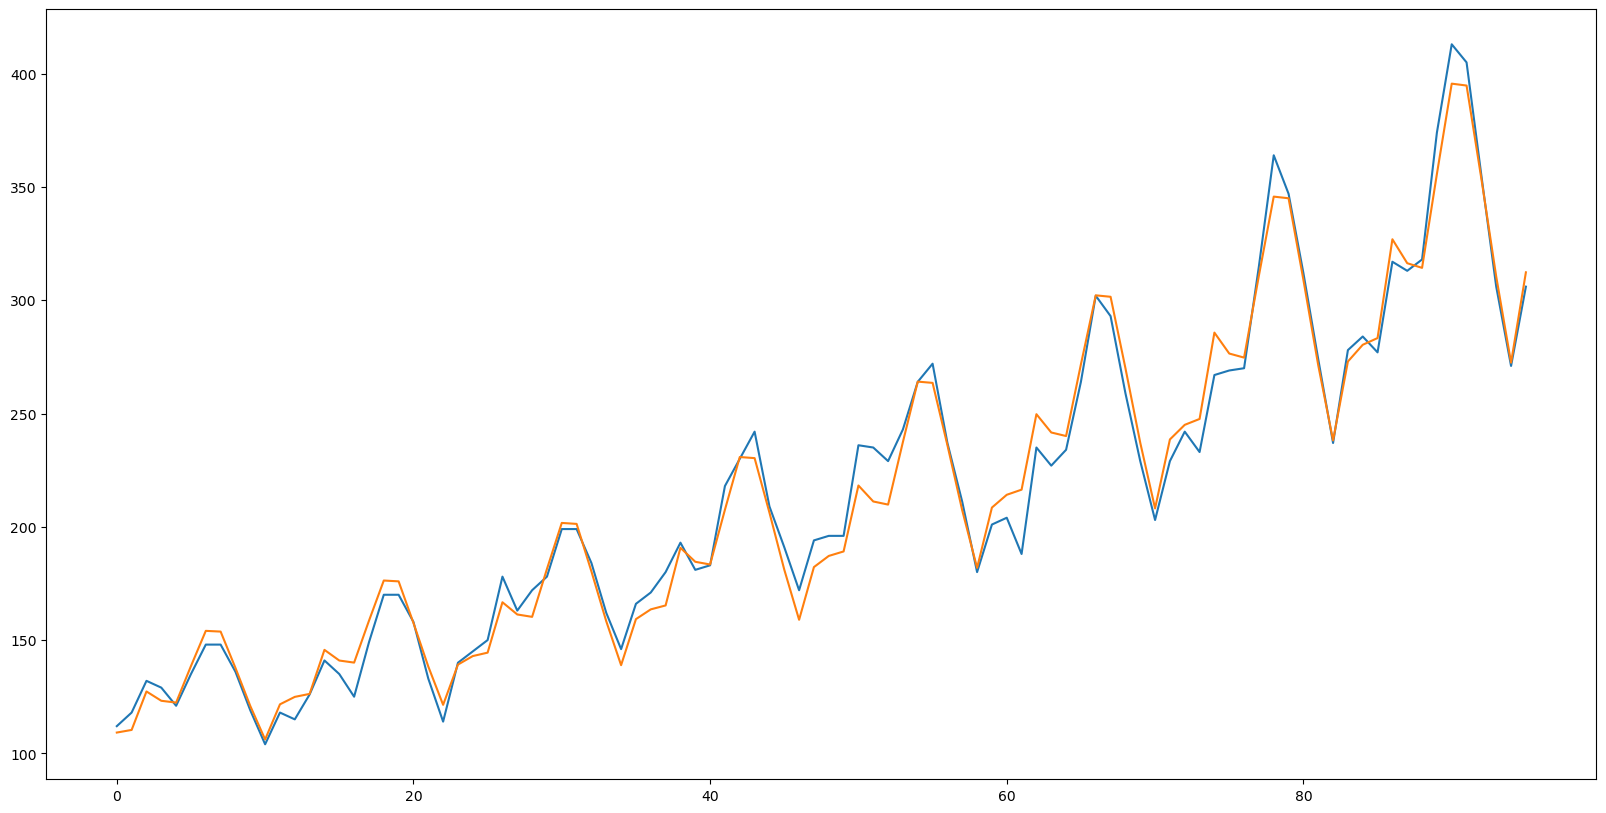

In [65]:
plt.figure(figsize=(20,10))
plt.plot(airline[['Passengers','forecasted_Passengers']].reset_index(drop=True))
plt.show()

In [68]:
airline=pd.read_excel("../Assignment 18-Forecasting/Airlines+Data.xlsx")
Train = airline.head(84)
Test = airline.tail(12)

In [69]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [70]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


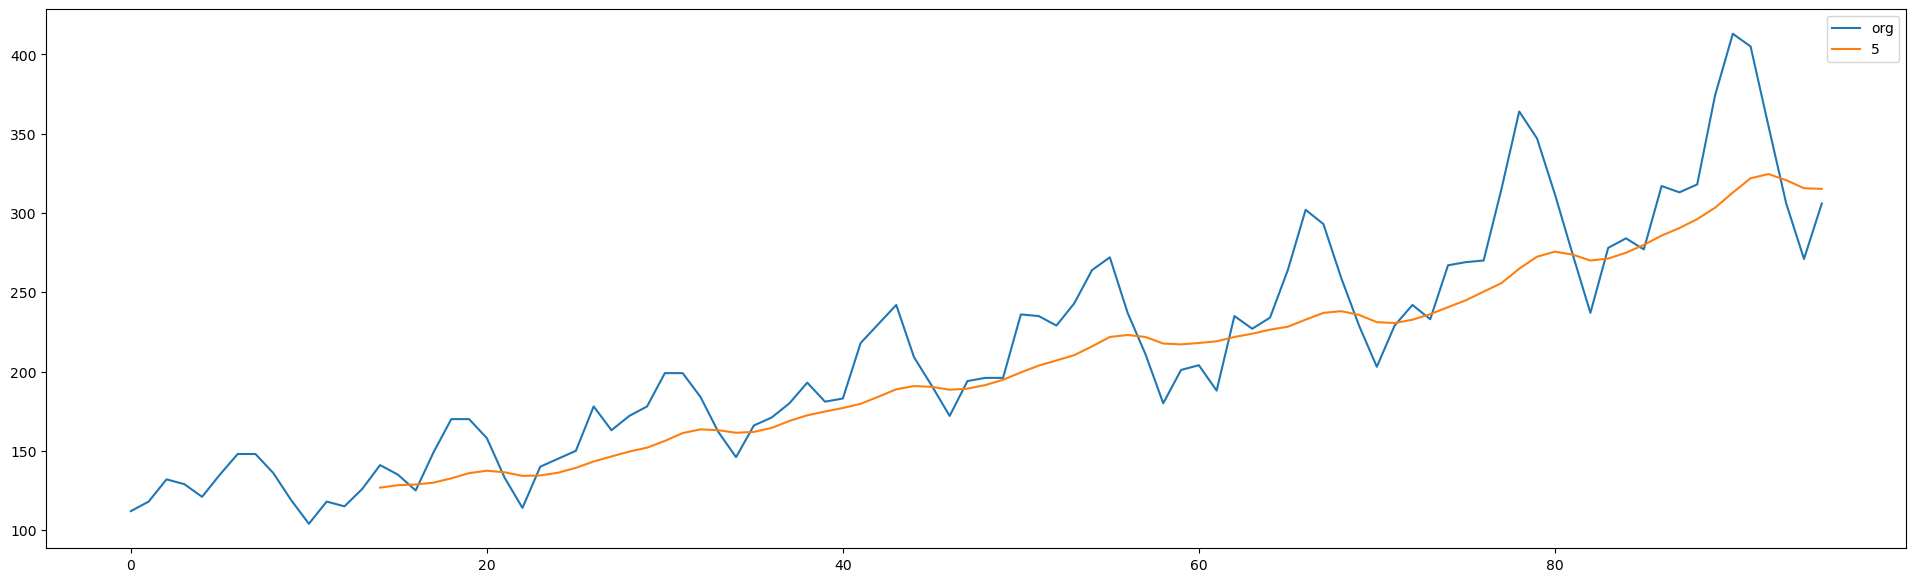

In [71]:
plt.figure(figsize=(24,7))
airline['Passengers'].plot(label="org")
airline["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')
plt.show()

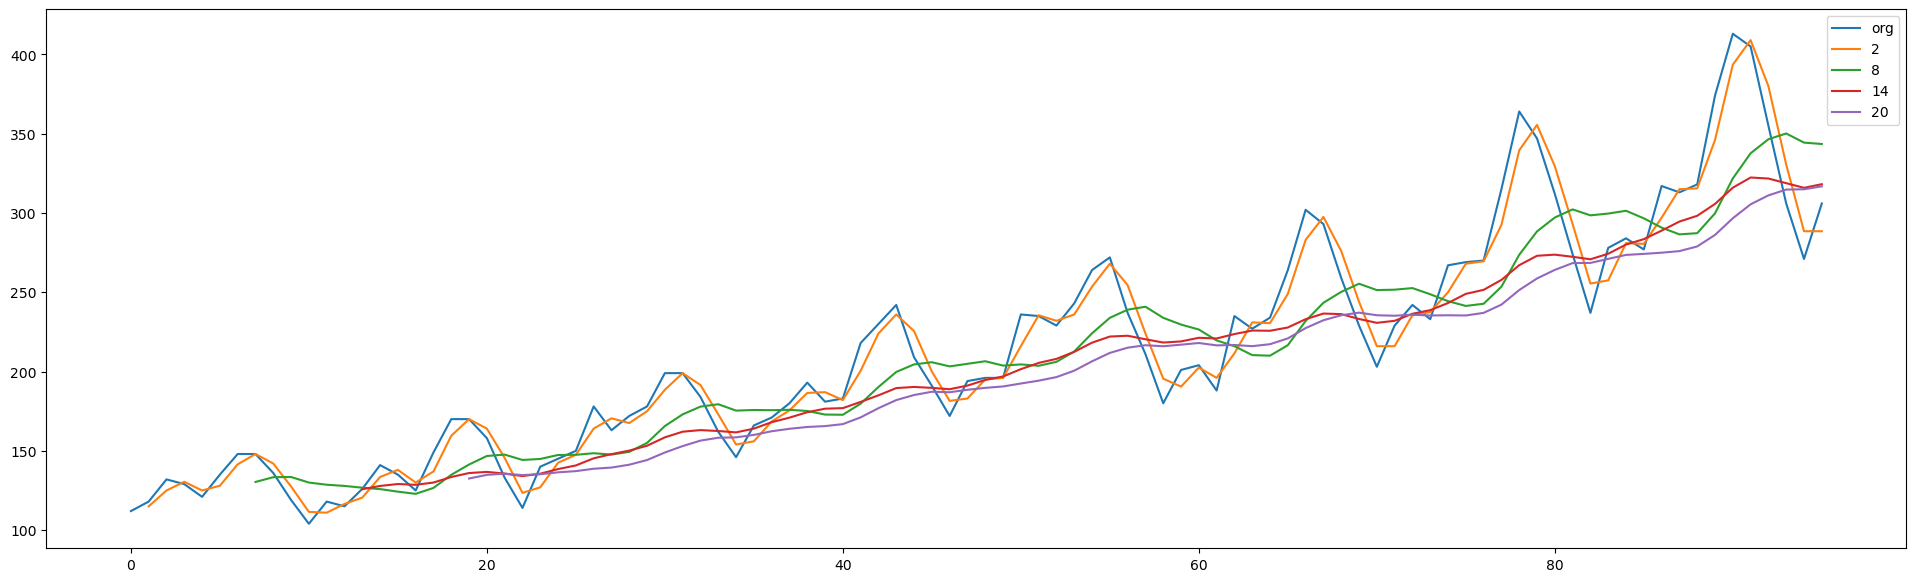

In [72]:
plt.figure(figsize=(24,7))
airline['Passengers'].plot(label="org")
for i in range(2,24,6):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

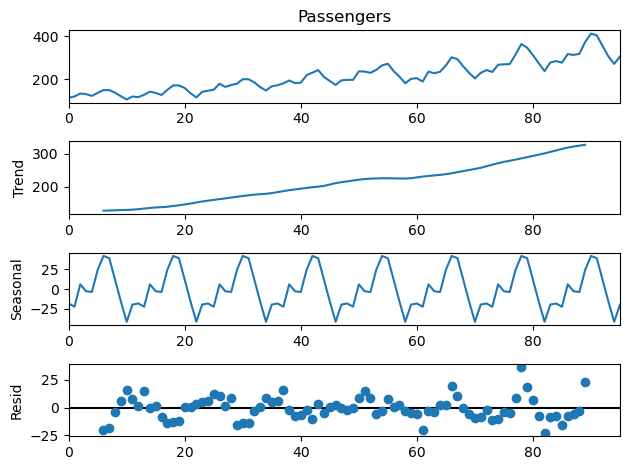

In [73]:
decompose_ts_add = seasonal_decompose(airline['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

In [74]:
import warnings
warnings.filterwarnings("ignore")

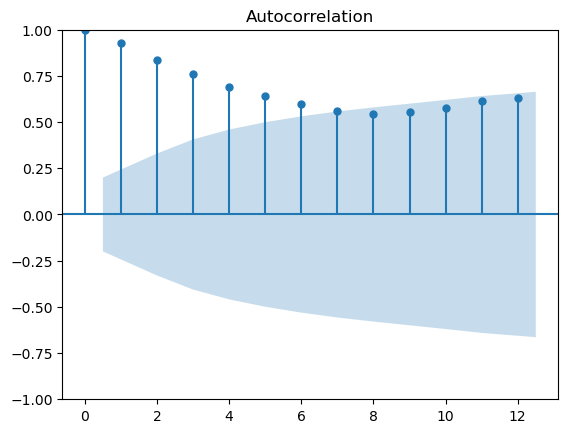

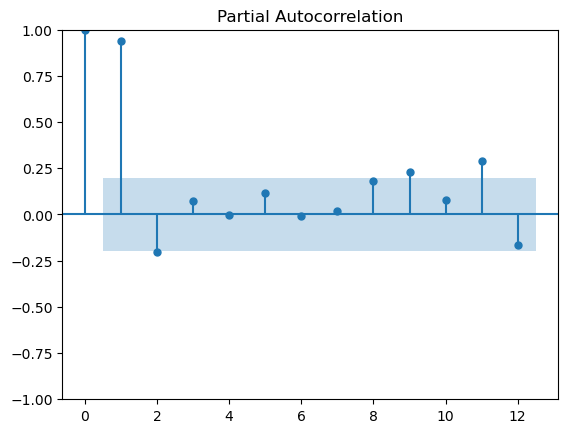

In [75]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers,lags=12)
tsa_plots.plot_pacf(airline.Passengers,lags=12)
plt.show()

In [76]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [77]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.411274740513823

In [78]:
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(optimized=True)

In [97]:
test_pred_ses = ses_model.forecast(12)

In [98]:
train_pred_ses = ses_model.fittedvalues

In [99]:
from math import sqrt

In [100]:
test_rmse_ses = sqrt(mean_squared_error(test_pred_session,Test.Passengers))

In [101]:
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,Train.Passengers))

In [102]:
mape_ses = MAPE(test_pred_ses,Test.Passengers)

In [103]:
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 14.235433154628128 
 Train Root Mean Squared Error = 21.247969155479684 
 Test Root Mean Squared Error = 68.00674031349644


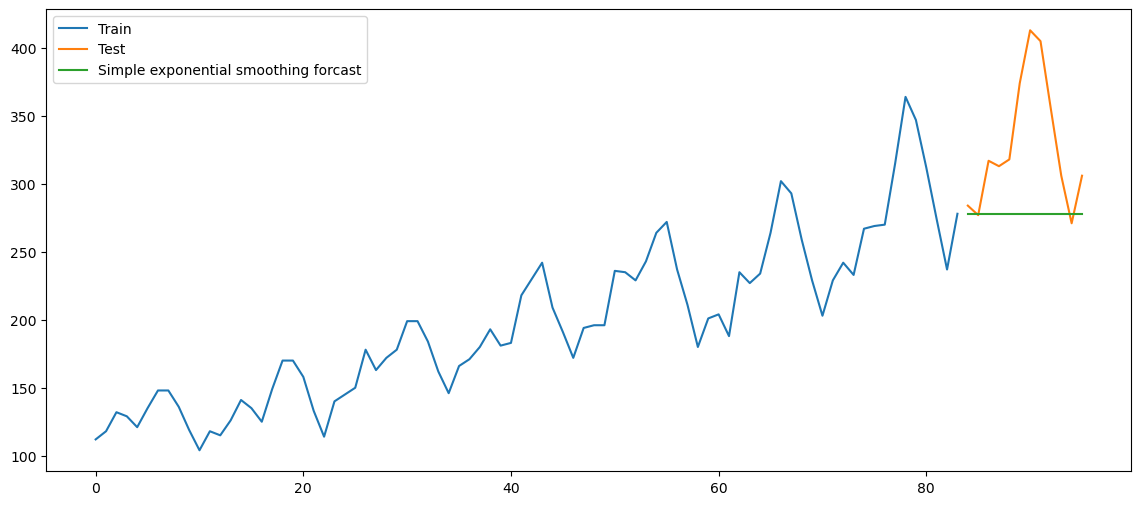

In [104]:
plt.figure(figsize=(14,6))
plt.plot(Train.Passengers, label='Train')
plt.plot(Test.Passengers, label='Test')
plt.plot(test_pred_session, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [105]:
dexp_model=Holt(Train.Passengers).fit(optimized=True)
test_pred_dexp=dexp_model.forecast(12)
train_pred_dexp=dexp_model.fittedvalues
test_rmse_dexp=sqrt(mean_squared_error(test_pred_dexp,Test.Passengers))
train_rmse_dexp=sqrt(mean_squared_error(train_pred_dexp,Train.Passengers))
mape_dexp=MAPE(test_pred_dexp,Test.Passengers)

In [106]:
mape_dexp,train_rmse_dexp,test_rmse_dexp

(11.839253076574318, 21.154758666198692, 58.57384693071804)

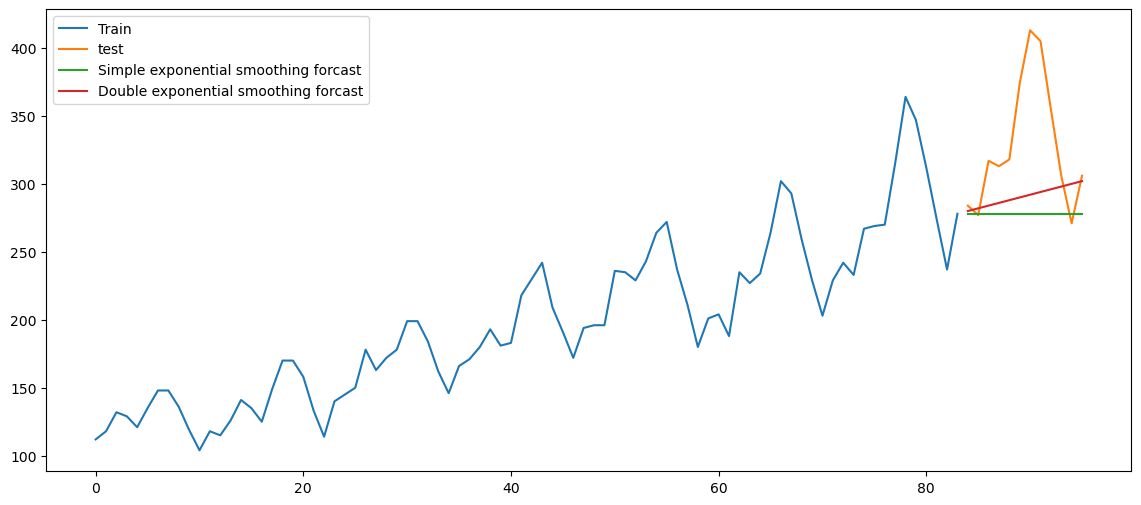

In [107]:
plt.figure(figsize=(14,6))
plt.plot(Train.Passengers, label='Train')
plt.plot(Test.Passengers, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [108]:
texp_add_model  = ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(12)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,Test.Passengers))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,Train.Passengers))
mape_ad_texp = MAPE(test_pred_ad_texp,Test.Passengers)

In [109]:
mape_ad_texp,train_rmse_ad_texp,test_rmse_ad_texp

(5.734104506475249, 9.20731366292567, 29.604474237998442)

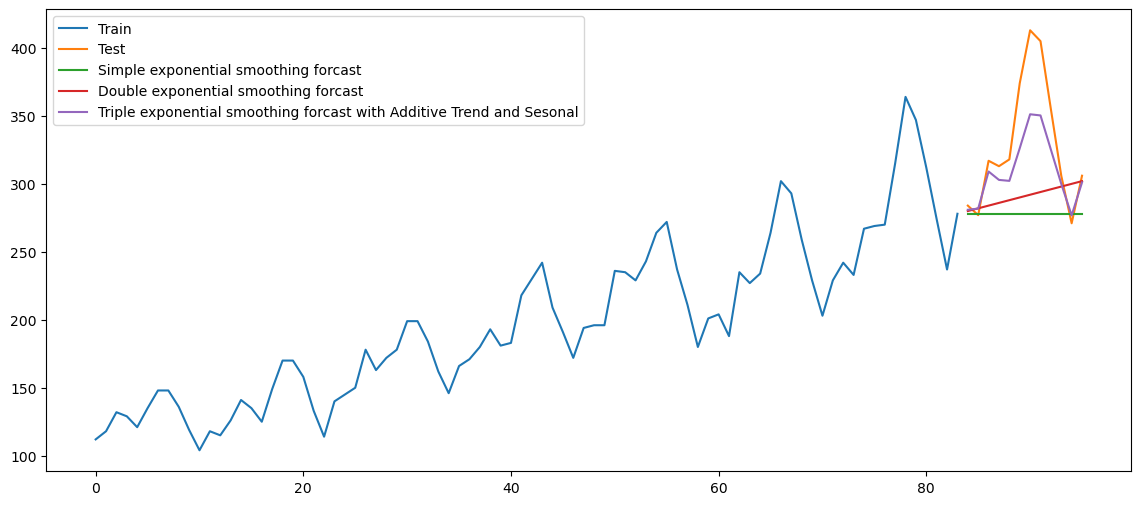

In [110]:
plt.figure(figsize=(14,6))
plt.plot(Train.Passengers, label='Train')
plt.plot(Test.Passengers, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

In [111]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [112]:
sales= pd.DataFrame()
sales['Passengers'] = airline[['Passengers']]
sales

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


In [113]:
sales.set_index(sales.index, inplace=True)

In [114]:
from statsmodels.tsa.stattools import adfuller

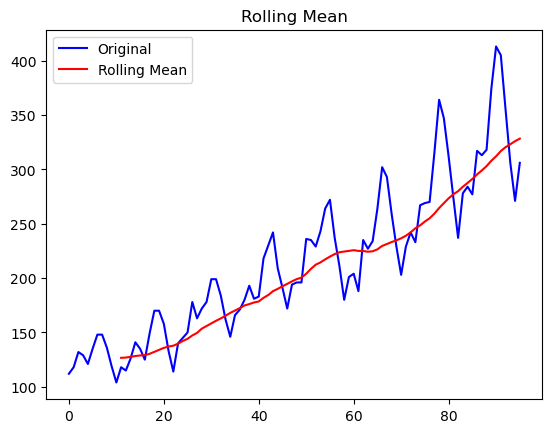

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [115]:
test_stationarity(sales)

In [116]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [117]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


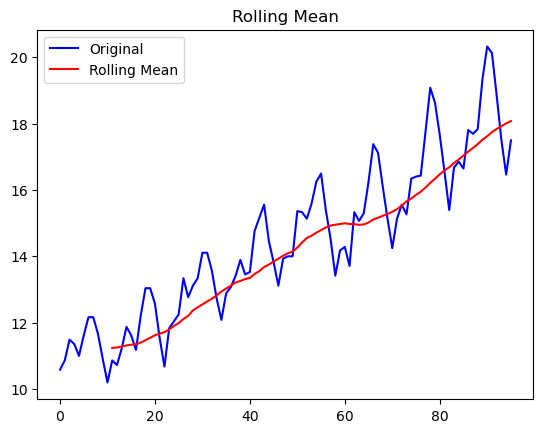

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [118]:
square_root= pd.DataFrame()
square_root = airline[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)
test_stationarity(square_root)

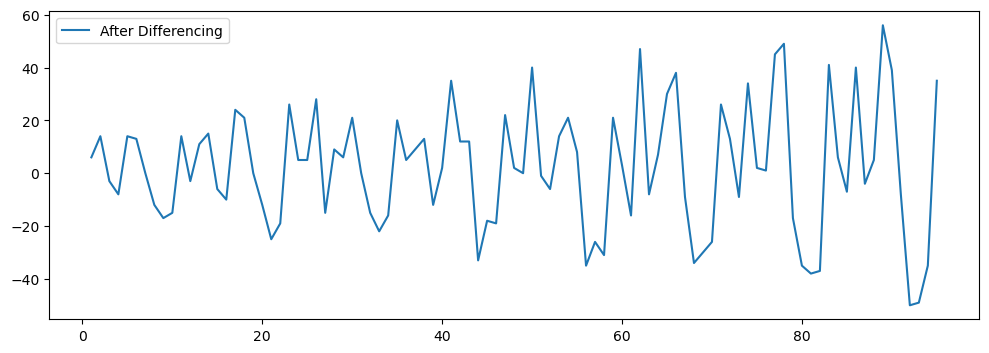

In [119]:
differencing = airline - airline.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing.Passengers, label='After Differencing')
plt.legend(loc='best')
plt.show()

In [120]:
differencing.reset_index(inplace=True)

In [121]:
differencing

,index,Month,Passengers
0,1,31 days,6.0
1,2,28 days,14.0
2,3,31 days,-3.0
3,4,30 days,-8.0
4,5,31 days,14.0
...,...,...,...
90,91,31 days,-8.0
91,92,31 days,-50.0
92,93,30 days,-49.0
93,94,31 days,-35.0


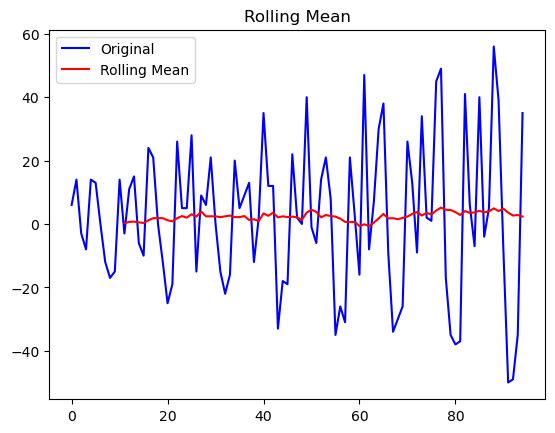

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [122]:
test_stationarity(differencing['Passengers'])

In [123]:
adf_test(differencing['Passengers'])

Fail to reject the null hypothesis
Data is non-stationary


In [124]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

23.53071965210049

In [125]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.734104506475249

In [126]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8211250300088824

In [127]:
hwe_model_mul_add = ExponentialSmoothing(airline["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [128]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
106    290.629755
107    330.595524
dtype: float64

In [129]:
#pip install pmdarima

In [130]:
import statsmodels.tsa.seasonal
from pmdarima import auto_arima

In [131]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

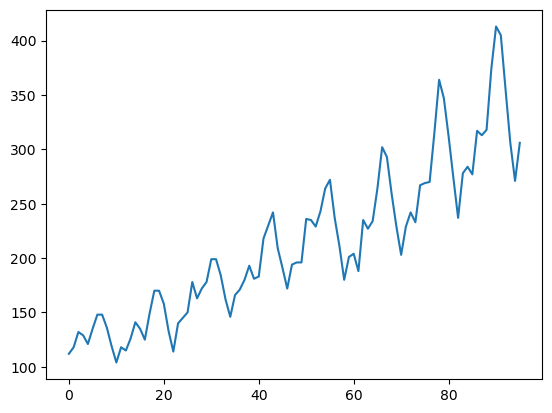

In [132]:
airline['Passengers'].plot()

In [133]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(airline['Passengers'])

(0.01, False)

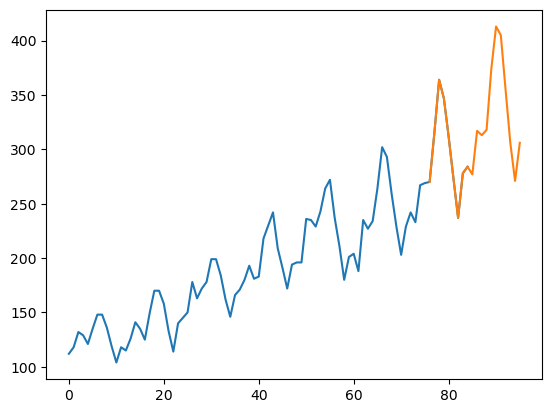

In [134]:
train = airline['Passengers'][:85]
test = airline['Passengers'][-20:]
plt.plot(train)
plt.plot(test)

In [135]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.07 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [136]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Sun, 31 Mar 2024   AIC                            537.388
Time:                                     18:26:59   BIC                            544.218
Sample:                                          0   HQIC                           540.108
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction

,predicted_pass
76,NaN
77,NaN
78,NaN
79,NaN
80,NaN
81,NaN
82,NaN
83,NaN
84,NaN
85,273.410932


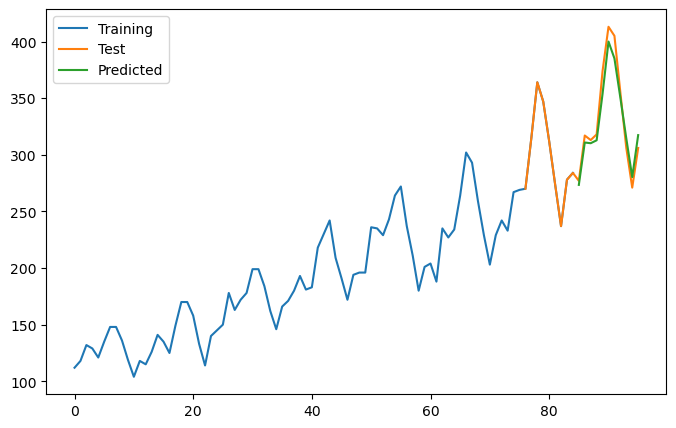

In [138]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

# Persistence Model

In [140]:
# evaluate a persistence model and load data
train = pd.read_excel("../Assignment 18-Forecasting/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
train = train.squeeze()

In [141]:
# prepare data
X = train.values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306], dtype=int64)

In [142]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306.], dtype=float32)

In [143]:
train_size = int(len(X) * 0.50)
train_size

48

In [144]:
train, test = X[0:train_size], X[train_size:]

In [145]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194.], dtype=float32)

In [146]:
test

array([196., 196., 236., 235., 229., 243., 264., 272., 237., 211., 180.,
       201., 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
       203., 229., 242., 233., 267., 269., 270., 315., 364., 347., 312.,
       274., 237., 278., 284., 277., 317., 313., 318., 374., 413., 405.,
       355., 306., 271., 306.], dtype=float32)

In [147]:
# walk-forward validation
history = [x for x in train]
import warnings
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0,
 230.0,
 242.0,
 209.0,
 191.0,
 172.0,
 194.0]

In [148]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>

In [149]:
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 28.762


# ARIMA Model

In [153]:
# save finalized model to file and load data
train = pd.read_excel("../Assignment 18-Forecasting/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [154]:
# prepare data
X = train.values
X = X.astype('float32')

In [155]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

array([327.52098053, 336.97643904, 363.4069585 , 374.27093393,
       387.0883956 , 383.22406763, 377.02888791, 360.90521447,
       347.4025902 , 333.97224267, 328.81604575, 328.9151164 ])

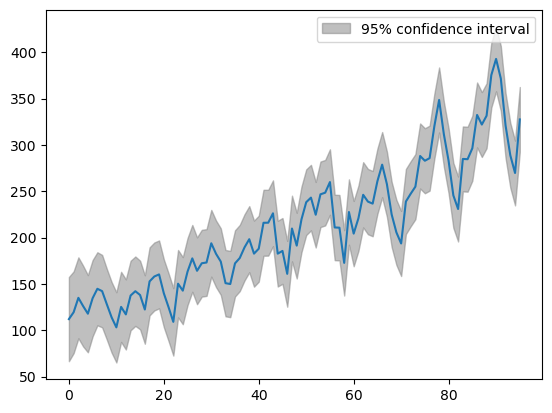

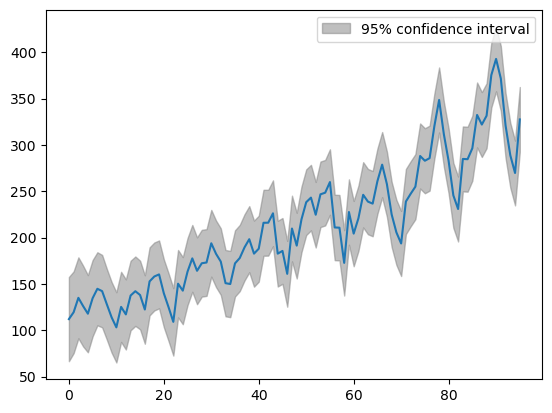

In [156]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)